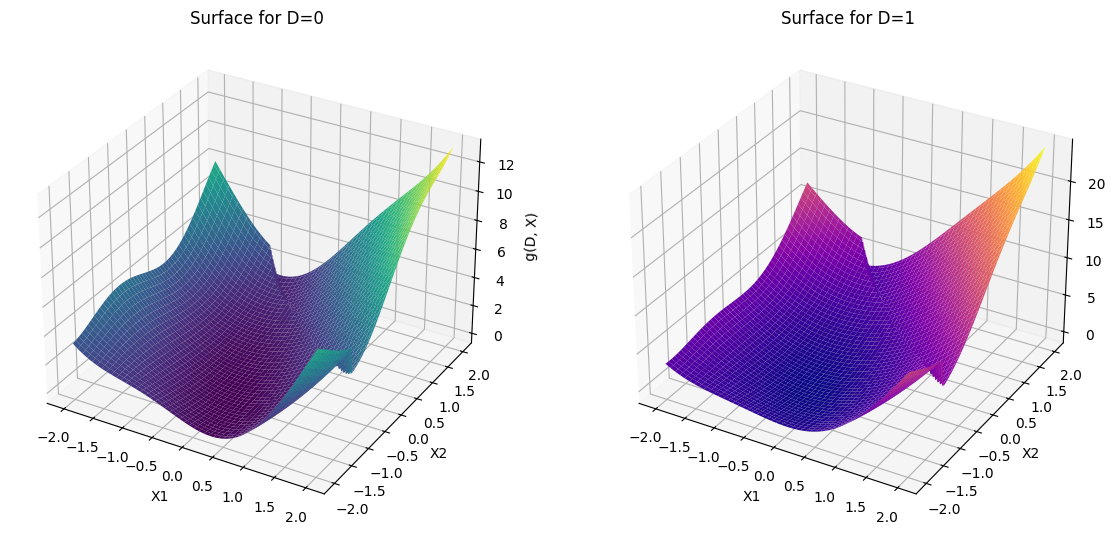

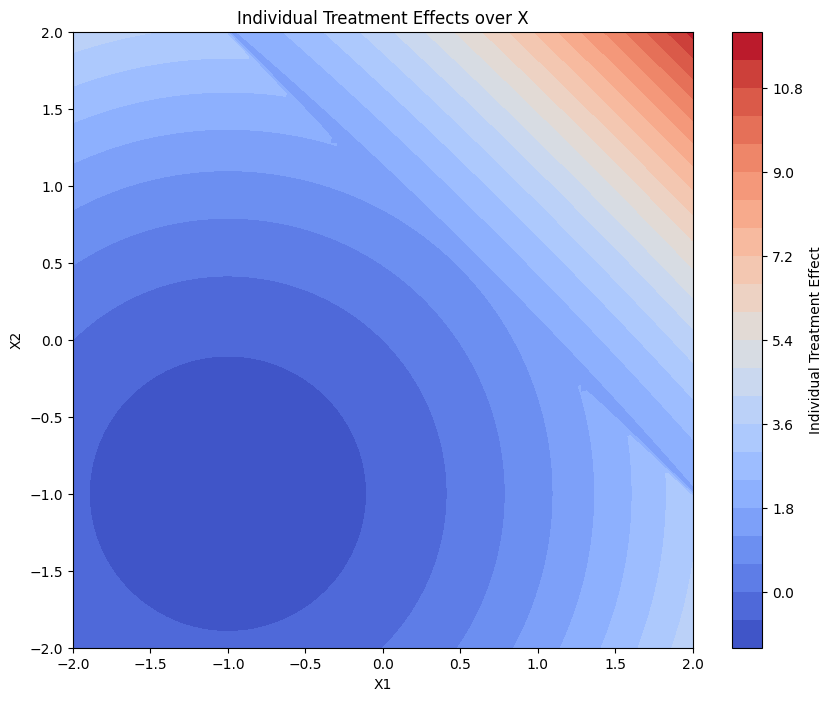

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Updated g function with separate fixed weights for interactive and non-interactive parts
def g(D, X, w_linear_int, w_squared_int, w_stepwise_int, w_linear_nonint, w_squared_nonint, w_stepwise_nonint):
    # Linear, squared, and stepwise terms
    linear_terms = np.sum(X, axis=1)
    interaction_terms = np.prod(X, axis=1)
    squared_terms = np.sum(X**2, axis=1)
    stepwise_terms = np.where(linear_terms > X.shape[1]/2, 1, 0) * interaction_terms
    
    # Interactive part (multiplies with D)
    interactive = D * (w_linear_int * linear_terms + w_squared_int * squared_terms + w_stepwise_int * stepwise_terms)
    
    # Non-interactive part (does not multiply with D)
    non_interactive = w_linear_nonint * linear_terms + w_squared_nonint * squared_terms + w_stepwise_nonint * stepwise_terms
    
    # Combined effect
    return interactive + non_interactive + np.sin(interaction_terms) + X[:, 0]**2

# Fixed weights for both interactive and non-interactive parts
w_linear_int = 1.0
w_squared_int = 0.5
w_stepwise_int = 0.9
w_linear_nonint = 0.8
w_squared_nonint = 0.4
w_stepwise_nonint = 0.9

# Generate a grid of points for X1 and X2
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

# Calculate g(D, X) for D = 0 and D = 1
Z_D0 = g(0, X_grid, w_linear_int, w_squared_int, w_stepwise_int, w_linear_nonint, w_squared_nonint, w_stepwise_nonint).reshape(X1.shape)
Z_D1 = g(1, X_grid, w_linear_int, w_squared_int, w_stepwise_int, w_linear_nonint, w_squared_nonint, w_stepwise_nonint).reshape(X1.shape)

# Compute the individual treatment effects over X
individual_effects = Z_D1 - Z_D0

# Plot the surfaces for D=0 and D=1
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Z_D0, cmap='viridis')
ax1.set_title('Surface for D=0')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('g(D, X)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1, X2, Z_D1, cmap='plasma')
ax2.set_title('Surface for D=1')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('g(D, X)')

plt.show()

# Plot the individual treatment effects
plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, individual_effects, cmap='coolwarm', levels=20)
plt.colorbar(label='Individual Treatment Effect')
plt.title('Individual Treatment Effects over X')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
Complex Nonlinear Function Data Generating Process
                       Mean  Variance    Bias  % Variance Reduction
Bivariate OLS       12.5070    0.1546  0.0078                  0.00
Multivariate OLS    12.4877    0.0773 -0.0114                 50.00
Interaction OLS     12.4338    0.0523 -0.0653          

/econ_share/home/pp712/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/econ_share/home/pp712/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/econ_share/home/pp712/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/econ_share/home/pp712/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

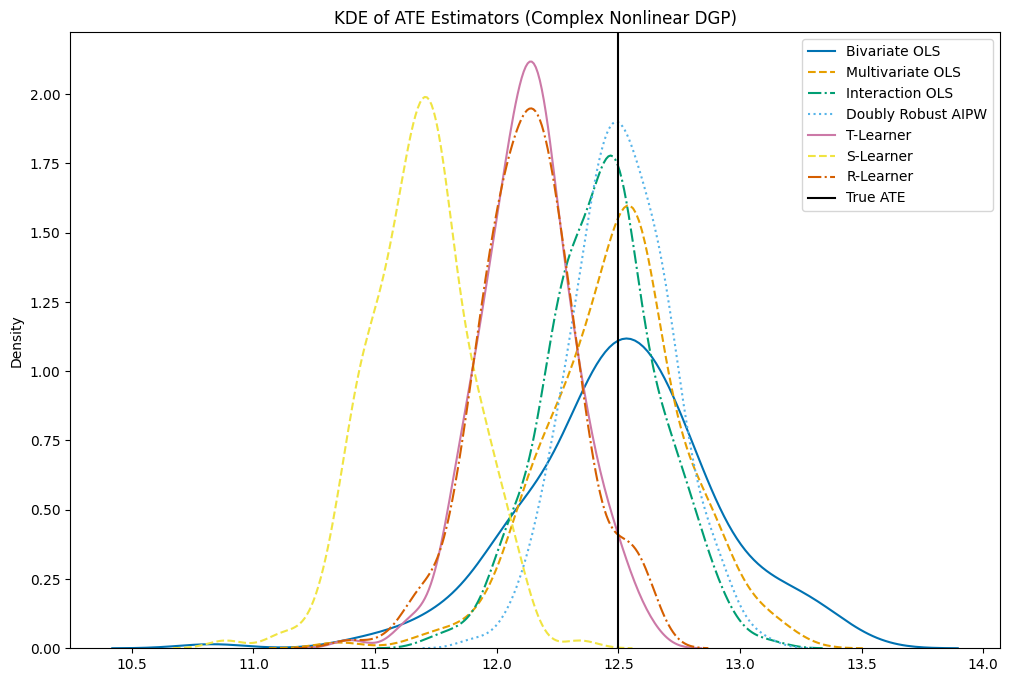

/econ_share/home/pp712/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/econ_share/home/pp712/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/econ_share/home/pp712/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


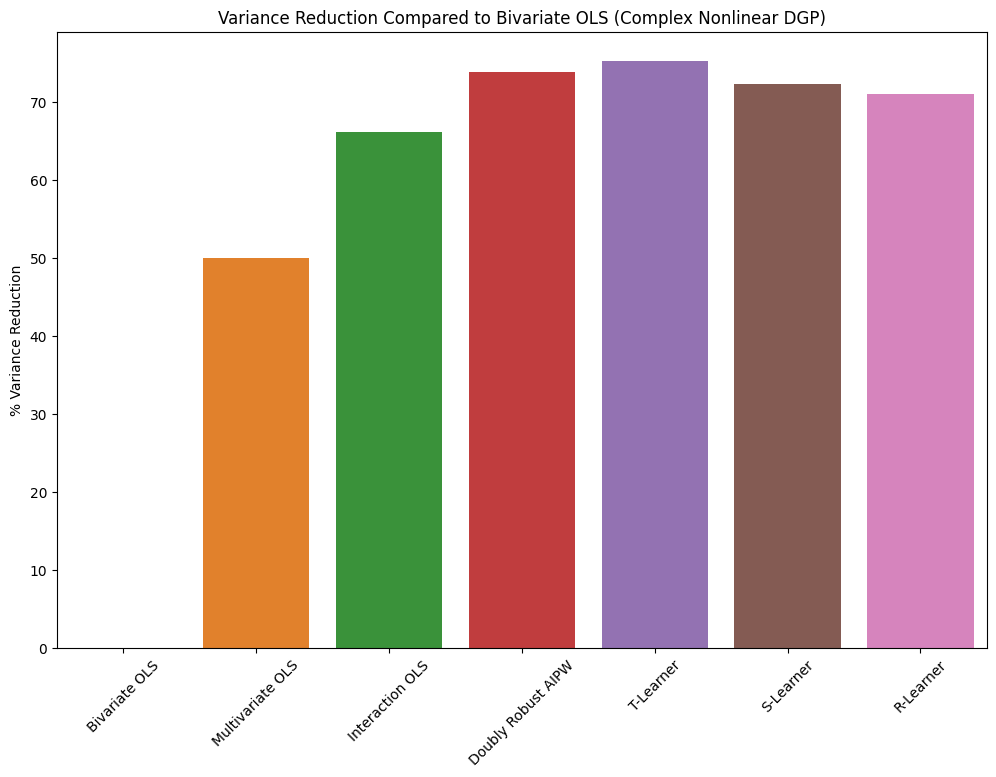

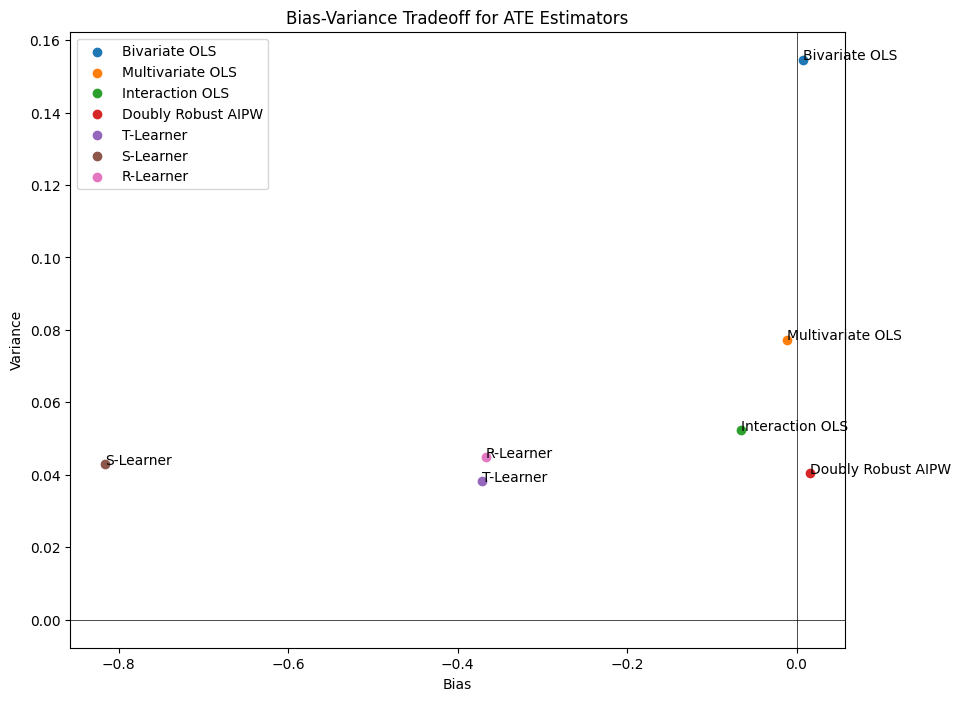

In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

def g(D, X):
    w_linear_int = 1.0
    w_squared_int = 0.5
    w_stepwise_int = 0.3
    w_linear_nonint = 0.8
    w_squared_nonint = 0.4
    w_stepwise_nonint = 0.2

    linear_terms = np.sum(X, axis=1)
    interaction_terms = np.prod(X, axis=1)
    squared_terms = np.sum(X**2, axis=1)
    stepwise_terms = np.where(linear_terms > X.shape[1]/2, 1, 0) * interaction_terms

    interactive = D * (w_linear_int * linear_terms + w_squared_int * squared_terms + w_stepwise_int * stepwise_terms)
    non_interactive = w_linear_nonint * linear_terms + w_squared_nonint * squared_terms + w_stepwise_nonint * stepwise_terms

    return interactive + non_interactive + np.sin(interaction_terms) + X[:, 0]**2

def generate_data_complex(N=100, p=0.1, K=2):
    X = np.random.normal(0, 1, (N, K))
    W = np.random.binomial(1, p=p, size=N)
    Y = g(W, X) + np.random.normal(size=N)
    return Y, W, X

def sample_split_predict(X, Y, W, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mu1 = np.zeros(len(Y))
    mu0 = np.zeros(len(Y))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        W_train = W[train_index]
        Y_train = Y[train_index]
        model_mu1 = lgb.LGBMRegressor(reg_alpha=0, verbose=-1)
        model_mu0 = lgb.LGBMRegressor(reg_alpha=0, verbose=-1)
        model_mu1.fit(X_train[W_train == 1], Y_train[W_train == 1])
        model_mu0.fit(X_train[W_train == 0], Y_train[W_train == 0])
        mu1[test_index] = model_mu1.predict(X_test)
        mu0[test_index] = model_mu0.predict(X_test)
    return mu1, mu0

def t_learner(X, Y, W, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mu1 = np.zeros(len(Y))
    mu0 = np.zeros(len(Y))
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        W_train = W[train_index]
        Y_train = Y[train_index]
        
        model_mu1 = lgb.LGBMRegressor(reg_alpha=0, verbose=-1)
        model_mu0 = lgb.LGBMRegressor(reg_alpha=0, verbose=-1)
        
        model_mu1.fit(X_train[W_train == 1], Y_train[W_train == 1])
        model_mu0.fit(X_train[W_train == 0], Y_train[W_train == 0])
        
        mu1[test_index] = model_mu1.predict(X_test)
        mu0[test_index] = model_mu0.predict(X_test)
    
    individual_effects = mu1 - mu0
    ATE_est = np.mean(individual_effects)
    return ATE_est

def s_learner(X, Y, W, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mu1 = np.zeros(len(Y))
    mu0 = np.zeros(len(Y))
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        W_train = W[train_index]
        Y_train = Y[train_index]
        
        X_augmented_train = np.column_stack((W_train, X_train))
        X_augmented_test = np.column_stack((W[test_index], X_test))
        
        model_s = lgb.LGBMRegressor(reg_alpha=0, verbose=-1)
        model_s.fit(X_augmented_train, Y_train)
        
        X_1 = np.column_stack((np.ones(len(X_test)), X_test))
        X_0 = np.column_stack((np.zeros(len(X_test)), X_test))
        
        mu1[test_index] = model_s.predict(X_1)
        mu0[test_index] = model_s.predict(X_0)
    
    individual_effects = mu1 - mu0
    ATE_est = np.mean(individual_effects)
    return ATE_est

def r_learner(X, Y, W, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    residual1 = np.zeros(len(Y))
    residual2 = np.zeros(len(W))
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train = Y[train_index]
        W_train = W[train_index]
        
        model_y = lgb.LGBMRegressor(reg_alpha=0, verbose=-1)
        model_t = lgb.LGBMRegressor(reg_alpha=0, verbose=-1)
        
        model_y.fit(X_train, Y_train)
        model_t.fit(X_train, W_train)
        
        residual1[test_index] = Y[test_index] - model_y.predict(X_test)
        residual2[test_index] = W[test_index] - model_t.predict(X_test)
    
    model_ols = LinearRegression().fit(residual2.reshape(-1, 1), residual1)
    ATE_est = model_ols.coef_[0]
    
    return ATE_est

def run_monte_carlo(N=10000, p=0.3, K=12, M=100, data_gen_func=generate_data_complex, **kwargs):
    results = {
        'Bivariate OLS': [],
        'Multivariate OLS': [],
        'Interaction OLS': [],
        'Doubly Robust AIPW': [],
        'T-Learner': [],
        'S-Learner': [],
        'R-Learner': []
    }
    
    for _ in range(M):
        print(_)
        Y, W, X = data_gen_func(N=N, p=p, K=K, **kwargs)
        
        model_1 = LinearRegression().fit(W.reshape(-1, 1), Y)
        results['Bivariate OLS'].append(model_1.coef_[0])
        
        X_W = np.column_stack((W, X))
        model_2 = LinearRegression().fit(X_W, Y)
        results['Multivariate OLS'].append(model_2.coef_[0])
        
        X_int = np.column_stack((W, X, W[:, np.newaxis] * (X - X.mean(axis=0))))
        model_3 = LinearRegression().fit(X_int, Y)
        results['Interaction OLS'].append(model_3.coef_[0])
        
        t_learner_ate = t_learner(X, Y, W)
        results['T-Learner'].append(t_learner_ate)
        
        s_learner_ate = s_learner(X, Y, W)
        results['S-Learner'].append(s_learner_ate)
        
        r_learner_ate = r_learner(X, Y, W)
        results['R-Learner'].append(r_learner_ate)

        mu1, mu0 = sample_split_predict(X, Y, W)
        ATE_est = np.mean(W * (Y - mu1) / p - (1 - W) * (Y - mu0) / (1 - p) + mu1 - mu0)
        results['Doubly Robust AIPW'].append(ATE_est)
    
    return results

def analyze_results(results, true_ate):
    summary_stats = {}
    for key in results:
        mean_est = np.mean(results[key])
        var_est = np.var(results[key])
        bias = mean_est - true_ate
        summary_stats[key] = {'Mean': round(mean_est, 4), 'Variance': round(var_est, 4), 'Bias': round(bias, 4)}

    bivariate_variance = summary_stats['Bivariate OLS']['Variance']
    for key in summary_stats:
        if key != 'Bivariate OLS':
            var_reduction = 100 * (bivariate_variance - summary_stats[key]['Variance']) / bivariate_variance
            summary_stats[key]['% Variance Reduction'] = round(var_reduction, 2)
        else:
            summary_stats[key]['% Variance Reduction'] = 0.0

    summary_df = pd.DataFrame
    summary_df = pd.DataFrame(summary_stats).transpose()
    return summary_df

def plot_kde(results, true_ate, title="KDE of ATE Estimators"):
    plt.figure(figsize=(12, 8))
    colors = ['#0072B2', '#E69F00', '#009E73', '#56B4E9', '#CC79A7', '#F0E442', '#D55E00']
    linestyles = ['-', '--', '-.', ':', '-', '--', '-.']

    for i, key in enumerate(results):
        sns.kdeplot(results[key], label=key, color=colors[i], linestyle=linestyles[i])
    plt.axvline(x=true_ate, color='black', linestyle='-', label='True ATE')
    plt.legend()
    plt.title(title)
    plt.show()

def plot_variance_reduction(summary_df, title="Variance Reduction Compared to Bivariate OLS"):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=summary_df.index, y='% Variance Reduction', data=summary_df)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

def plot_bias_variance(summary_df):
    plt.figure(figsize=(10, 8))
    for key in summary_df.index:
        plt.scatter(summary_df.loc[key, 'Bias'], summary_df.loc[key, 'Variance'], label=key)
        plt.text(summary_df.loc[key, 'Bias'], summary_df.loc[key, 'Variance'], key)
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('Bias')
    plt.ylabel('Variance')
    plt.title('Bias-Variance Tradeoff for ATE Estimators')
    plt.legend()
    plt.show()

N = 10000
p = 0.1
K = 25
M = 200

Y_large, W_large, X_large = generate_data_complex(N=10000000, p=p, K=K)
true_ate = np.mean(Y_large[W_large == 1]) - np.mean(Y_large[W_large == 0])

results_complex = run_monte_carlo(N=N, p=p, K=K, M=M, data_gen_func=generate_data_complex)
summary_df_complex = analyze_results(results_complex, true_ate)

print("Complex Nonlinear Function Data Generating Process")
print(summary_df_complex)

plot_kde(results_complex, true_ate=true_ate, title="KDE of ATE Estimators (Complex Nonlinear DGP)")
plot_variance_reduction(summary_df_complex, title="Variance Reduction Compared to Bivariate OLS (Complex Nonlinear DGP)")
plot_bias_variance(summary_df_complex)